<a href="https://colab.research.google.com/github/PRIYANKA-1907/Meme_Poster_Creator_AI/blob/main/AI_CLOUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai pillow requests


Selected Caption: When you study all night and still fail 😅
Meme saved as meme_output.png


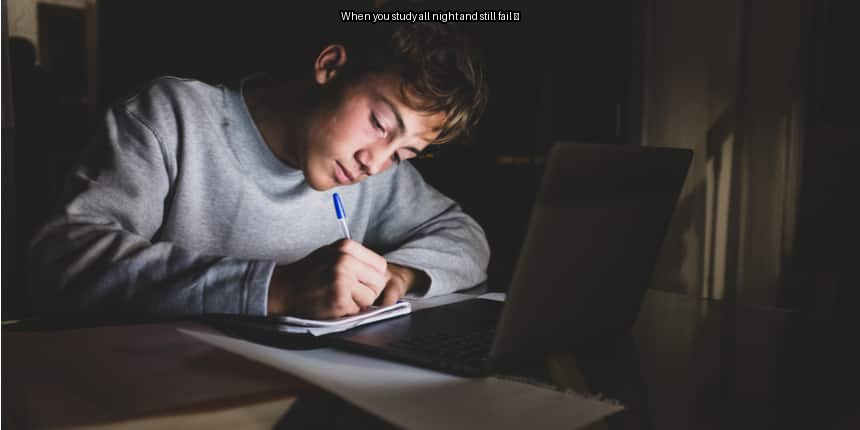

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import random
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
from IPython.display import display
from google.colab import files

# === Predefined funny captions ===
funny_captions = [
    "When you study all night and still fail 😅",
    "Me trying to understand calculus 🤯",
    "Procrastination level: Expert 🏆",
    "Coffee: my only motivation ☕",
    "Group project? More like group chaos 😬"
]

# === Function to select a random caption ===
def generate_meme_caption():
    return random.choice(funny_captions)

# === Function to create meme image with caption ===
def create_meme(image_url, caption, output_file="meme_output.png"):
    try:
        response = requests.get(image_url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
    except Exception as e:
        print("Error loading image from URL:", e)
        return

    draw = ImageDraw.Draw(img)
    width, height = img.size
    font_size = int(height/10)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except:
        font = ImageFont.load_default()

    # Split caption into multiple lines
    lines = []
    words = caption.split()
    line = ""
    for word in words:
        test_line = (line + " " + word).strip()
        bbox = draw.textbbox((0,0), test_line, font=font)
        text_width = bbox[2] - bbox[0]
        if text_width < width:
            line = test_line
        else:
            lines.append(line)
            line = word
    lines.append(line)

    # Add text to top of image
    y_text = 10
    for line in lines:
        bbox = draw.textbbox((0,0), line, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_text = (width - text_width)/2
        draw.text((x_text, y_text), line, font=font, fill="white", stroke_fill="black", stroke_width=2)
        y_text += text_height + 5

    # Save meme
    img.save(output_file)
    print(f"Meme saved as {output_file}")

    # Display the meme in Colab
    display(img)

    # Allow downloading the meme
    files.download(output_file)

# === Main program ===
if __name__ == "__main__":
    image_url = "https://cache.careers360.mobi/media/presets/860X430/article_images/2021/12/27/How-to-study-at-night.jpg"  # Replace with any URL
    caption = generate_meme_caption()
    print("Selected Caption:", caption)

    create_meme(image_url, caption)
